In [1]:
from cloudvolume import CloudVolume
from skimage.transform import downscale_local_mean
import napari
from skimage import io
import random
import h5py
from skimage import measure
from brainlit.preprocessing import removeSmallCCs
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import ticker
import subprocess
import tables
from scipy.stats import gaussian_kde, kstest
from scipy import stats
from tqdm import tqdm
%gui qt5

/Users/thomasathey/Documents/mimlab/mouselight/docs_env/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
(1555,)
(1480,)
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
(1876,)
(4465,)
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
(973,)
(1440,)


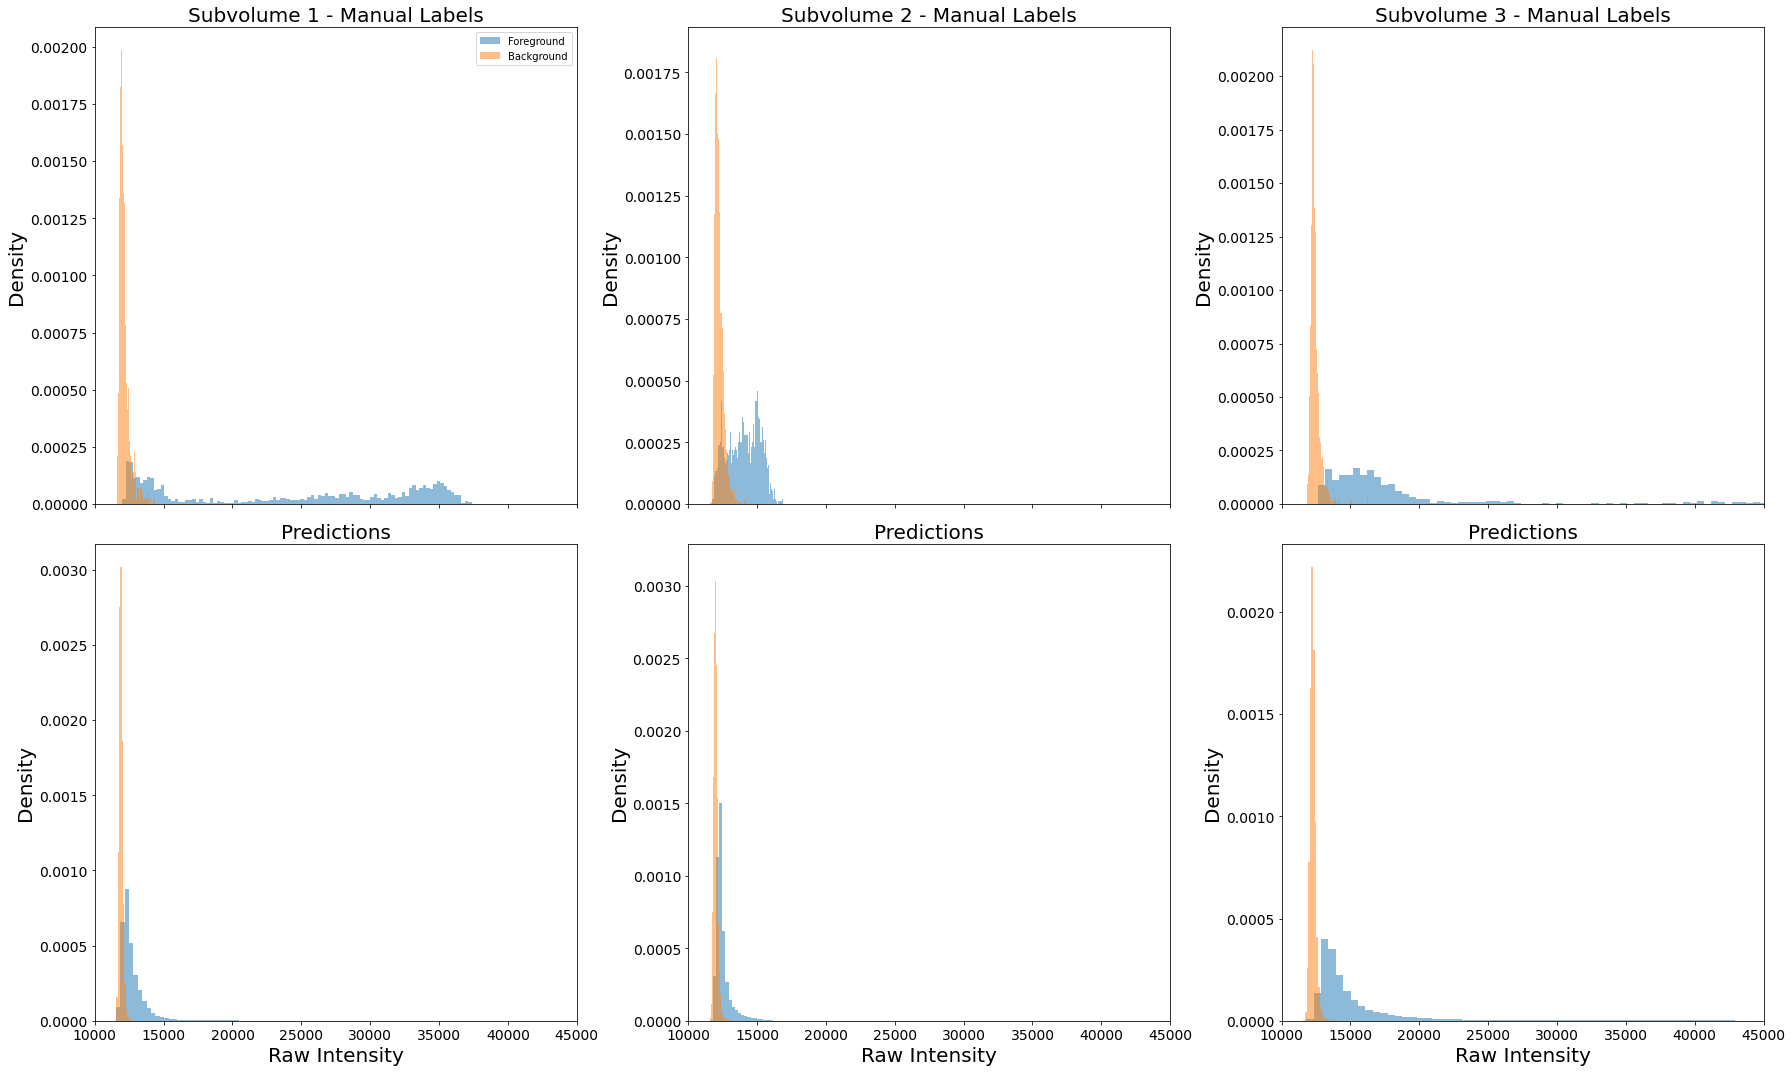

In [3]:

fig, axs = plt.subplots(2,3)
for i in range(10,13):
    ax1 = axs[0, i-10]
    ax2 = axs[1, i-10]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    fg_lab = im[labels == 2]
    print(fg_lab.shape)
    bg_lab = im[labels == 1]
    print(bg_lab.shape)
    fg_pred = im[pred == 2]
    bg_pred = im[pred == 1]

    _, bs1, _ = ax1.hist(fg_lab, bins=100, label='Foreground', alpha=0.5, density=True)
    ax2.hist(fg_pred, bins=100, label= 'Foreground', alpha=0.5, density=True)
    _, bs2, _ = ax1.hist(bg_lab, bins=100, label='Background', alpha=0.5, density=True)
    ax2.hist(bg_pred, bins=100, label='Background', alpha=0.5, density=True)
    
    ax2.set_xlabel("Raw Intensity", fontsize=20)
    ax1.set_xlim([10000,45000])
    ax1.set_xticklabels([])
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax2.set_xlim([10000,45000])

    ax1.set_ylabel("Density", fontsize=20)
    ax2.set_ylabel("Density", fontsize=20)

    ax1.set_title("Subvolume " + str(i-9) + " - Manual Labels", fontsize=20)
    ax2.set_title("Predictions", fontsize=20)
axs[0,0].legend()
fig.set_figheight(15)
fig.set_figwidth(25)
fig.tight_layout()

<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 1.8276984180389393e-245
Labeled Background p-val norm: 0.0, p-val poisson: 7.460554771206806e-100
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-val poisson: 4.141736530192356e-07
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 1.7516428586759357e-162
Labeled Background p-val norm: 0.0, p-val poisson: 1.63672353836749e-75
Predicted Foreground p-val norm: 0.0, p-val poisson: 2.2777539288403857e-181
Predicted Background p-val norm: 0.0, p-val poisson: 2.0433966954060784e-06
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 0.0
Labeled Background p-val norm: 0.0, p-val poisson: 4.620954487701326e-74
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0

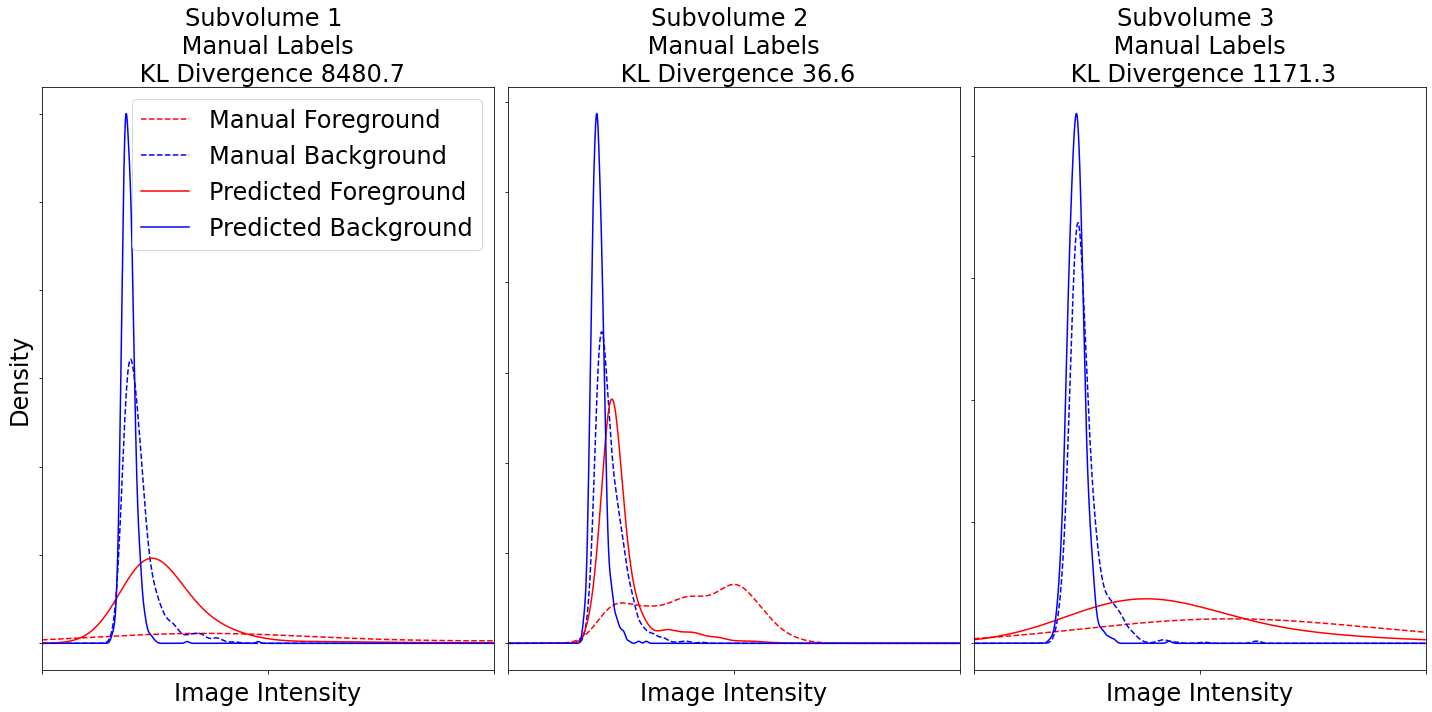

In [9]:

fig, axs = plt.subplots(1,3)
for i in range(10,13):
    ax1 = axs[i-10]
    #ax2 = axs[1, i-10]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    fg_lab = im[labels == 2].flatten()
    np.random.shuffle(fg_lab)
    fg_lab = fg_lab[:900]
    _, p_norm = kstest(fg_lab, "norm")
    _, p_poisson = kstest(fg_lab, "poisson", args = (np.mean(fg_lab),))
    print(f"Labeled Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_lab = im[labels == 1].flatten()
    np.random.shuffle(bg_lab)
    bg_lab = bg_lab[:900]
    _, p_norm = kstest(bg_lab, "norm")
    _, p_poisson = kstest(bg_lab, "poisson", args = (np.mean(bg_lab),))
    print(f"Labeled Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    fg_pred = im[pred == 2].flatten()
    np.random.shuffle(fg_pred)
    fg_pred = fg_pred[:900]
    _, p_norm = kstest(fg_pred, "norm")
    _, p_poisson = kstest(fg_pred, "poisson", args = (np.mean(fg_pred),))
    print(f"Predicted Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_pred = im[pred == 1].flatten()
    np.random.shuffle(bg_pred)
    bg_pred = bg_pred[:900]
    _, p_norm = kstest(bg_pred, "norm")
    _, p_poisson = kstest(bg_pred, "poisson", args = (np.mean(bg_pred),))
    print(f"Predicted Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    ts = np.arange(10000, 40000, 1)

    kde_fg = gaussian_kde(fg_lab)
    ax1.plot(ts, kde_fg.evaluate(ts), 'r--', label="Manual Foreground")

    kde_bg = gaussian_kde(bg_lab)
    ax1.plot(ts, kde_bg.evaluate(ts), 'b--', label="Manual Background")

    kl_div_lab = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))

    kde_fg = gaussian_kde(fg_pred)
    ax1.plot(ts, kde_fg.evaluate(ts), 'r-', label="Predicted Foreground")

    kde_bg = gaussian_kde(bg_pred)
    ax1.plot(ts, kde_bg.evaluate(ts), 'b-', label="Predicted Background")

    kl_div_pred = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))
    
    ax1.set_xlabel("Image Intensity", fontsize=24)

    # if i == 10:
    #     xmax = 40000
    # elif i == 11:
    #     xmax = 20000
    # elif i == 12:
    xmax = 20000


    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_xlim([10000,xmax])
    ax1.set_xticks([10000, (xmax+10000)/2, xmax])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # ax2.tick_params(axis='both', which='major', labelsize=14)
    # ax2.set_xlim([10000,xmax])
    # ax2.set_xticks([10000, (xmax+10000)/2, xmax])
    # ax2.set_xticklabels([])
    # ax2.set_yticklabels([])
    if i == 10:
        ax1.set_ylabel("Density", fontsize=24)
        #ax2.set_ylabel("Density", fontsize=24)
    else:
        ax1.set_ylabel("")
        #ax2.set_ylabel("")


    ax1.set_title(f"Subvolume {i-9} \n Manual Labels \n KL Divergence {kl_div_lab:.1f}", fontsize=24)
    #ax2.set_title(f"Predictions \n KL Divergence: {kl_div_pred:.1f}", fontsize=24)
axs[0].legend(prop={'size': 24})
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 3.6582717028514424e-244
Labeled Background p-val norm: 0.0, p-val poisson: 6.100907284369952e-107
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-val poisson: 0.004609720938493507
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 9.910136068346562e-157
Labeled Background p-val norm: 0.0, p-val poisson: 1.3065644672133711e-86
Predicted Foreground p-val norm: 0.0, p-val poisson: 1.3748589599294025e-185
Predicted Background p-val norm: 0.0, p-val poisson: 0.0004827052028950583
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 0.0
Labeled Background p-val norm: 0.0, p-val poisson: 7.339806544143e-69
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-

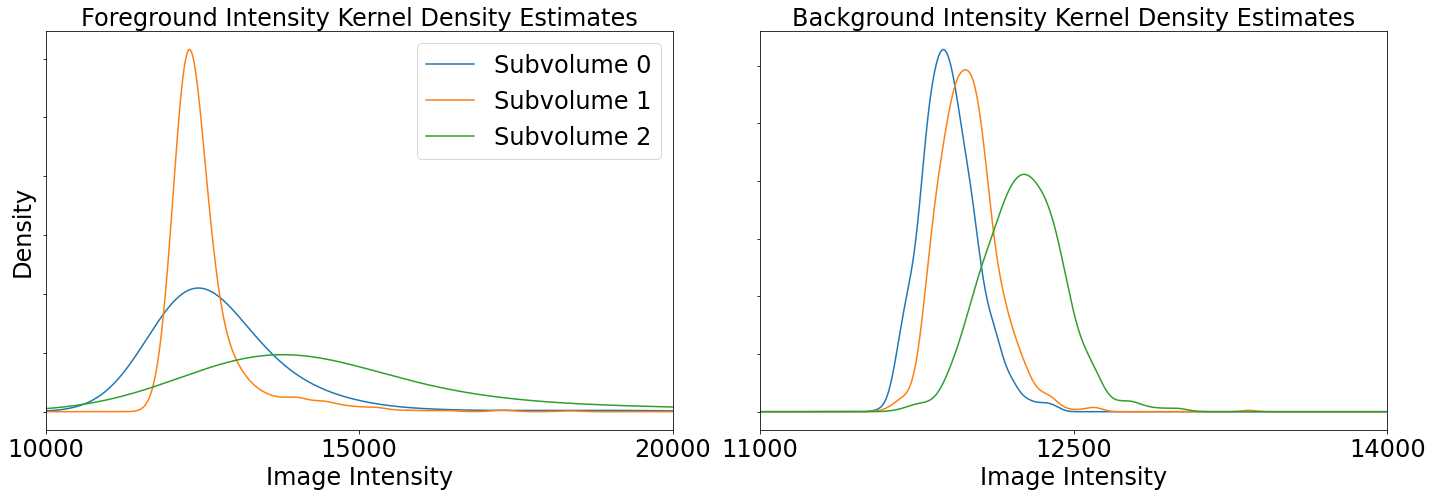

In [28]:

fig, axs = plt.subplots(1,2)
ax_fg = axs[0]
ax_bg = axs[1]

colors = ['r', 'b', 'g']

for i in range(10,13):
    #ax2 = axs[1, i-10]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    fg_lab = im[labels == 2].flatten()
    np.random.shuffle(fg_lab)
    fg_lab = fg_lab[:900]
    _, p_norm = kstest(fg_lab, "norm")
    _, p_poisson = kstest(fg_lab, "poisson", args = (np.mean(fg_lab),))
    print(f"Labeled Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_lab = im[labels == 1].flatten()
    np.random.shuffle(bg_lab)
    bg_lab = bg_lab[:900]
    _, p_norm = kstest(bg_lab, "norm")
    _, p_poisson = kstest(bg_lab, "poisson", args = (np.mean(bg_lab),))
    print(f"Labeled Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    fg_pred = im[pred == 2].flatten()
    np.random.shuffle(fg_pred)
    fg_pred = fg_pred[:900]
    _, p_norm = kstest(fg_pred, "norm")
    _, p_poisson = kstest(fg_pred, "poisson", args = (np.mean(fg_pred),))
    print(f"Predicted Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_pred = im[pred == 1].flatten()
    np.random.shuffle(bg_pred)
    bg_pred = bg_pred[:900]
    _, p_norm = kstest(bg_pred, "norm")
    _, p_poisson = kstest(bg_pred, "poisson", args = (np.mean(bg_pred),))
    print(f"Predicted Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    ts = np.arange(10000, 40000, 1)


    kl_div_lab = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))

    kde_fg = gaussian_kde(fg_pred)
    ax_fg.plot(ts, kde_fg.evaluate(ts), label=f"Subvolume {i-10}")

    kde_bg = gaussian_kde(bg_pred)
    ax_bg.plot(ts, kde_bg.evaluate(ts))

    kl_div_pred = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))
    


xmax = 20000
ax_fg.tick_params(axis='both', which='major', labelsize=14)
ax_fg.set_xlim([10000,xmax])
ax_fg.set_xticks([10000, (xmax+10000)/2, xmax])
ax_fg.set_xticklabels([10000, int((xmax+10000)/2), xmax], fontdict={'fontsize': 24})
ax_fg.set_yticklabels([])
ax_fg.set_ylabel("Density", fontsize=24)
ax_fg.set_xlabel("Image Intensity", fontsize=24)
ax_fg.set_title(f"Foreground Intensity Kernel Density Estimates", fontsize=24)

xmax = 14000
xmin = 11000
ax_bg.tick_params(axis='both', which='major', labelsize=14)
ax_bg.set_xlim([xmin,xmax])
ax_bg.set_xticks([xmin, (xmax+xmin)/2, xmax])
ax_bg.set_xticklabels([xmin, int((xmax+xmin)/2), xmax], fontdict={'fontsize': 24})
ax_bg.set_yticklabels([])
ax_bg.set_xlabel("Image Intensity", fontsize=24)
ax_bg.set_title(f"Background Intensity Kernel Density Estimates", fontsize=24)

ax_fg.legend(prop={'size': 24})
fig.set_figheight(7)
fig.set_figwidth(20)
fig.tight_layout()